### Problem 2

##### Make sure you sort eigenvals/functions (note from piazza)

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate
from matplotlib.pyplot import figure
%matplotlib notebook

In [2]:
# Define some constants 
K = 1
L = 4

xp = [-L, L]
x_evals = np.linspace(-L,L,20*L+1) 
deltax = x_evals[1] - x_evals[0]

In [3]:
Diagonal = np.array([])
for x in x_evals[1:80]:
#     d = (2/(deltax**2))+(K*(x**2))
    d = (2)+(K*(x**2)*deltax**2)
    Diagonal = np.append(Diagonal,d)
    
Upper = (-1)*np.ones(x_evals.shape[0]-3)
Lower = (-1)*np.ones(x_evals.shape[0]-3);
A = np.diag(Diagonal) + np.diag(Upper, 1) + np.diag(Lower, -1)
# A

In [4]:
A

array([[ 2.1521, -1.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [-1.    ,  2.1444, -1.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , -1.    ,  2.1369, ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  2.1369, -1.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ..., -1.    ,  2.1444, -1.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    , -1.    ,  2.1521]])

In [5]:
# Changing left end point boundary conditions
A[0,0] = ((-4/3)+2) + (deltax**2*K*x_evals[1]**2)
A[0,1] = (1/3)-1

In [6]:
A

array([[ 0.81876667, -0.66666667,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  2.1444    , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.        ,  2.1369    , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  2.1369    ,
        -1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -1.        ,
         2.1444    , -1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.        ,  2.1521    ]])

In [7]:
# # Changing right end point boundary conditions
A[78,-1] = ((-4/3)+2) + (deltax**2*K*x_evals[1]**2)
A[78,-2] = (1/3)-1

In [8]:
A

array([[ 0.81876667, -0.66666667,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  2.1444    , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.        ,  2.1369    , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  2.1369    ,
        -1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -1.        ,
         2.1444    , -1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.66666667,  0.81876667]])

In [9]:
w, v = np.linalg.eig(A) 

### Eigenvalues

In [10]:
sort_id = np.argsort(w)
w = w[sort_id]
v = v[:,sort_id]

In [11]:
w

array([0.00999374, 0.02996839, 0.04991407, 0.06980389, 0.089506  ,
       0.10860284, 0.12646794, 0.14351412, 0.16208655, 0.18442003,
       0.21092397, 0.24113222, 0.2746345 , 0.31118413, 0.35062558,
       0.39284552, 0.43774941, 0.48525069, 0.53526552, 0.58771004,
       0.64249893, 0.69954458, 0.75875666, 0.82004192, 0.88330403,
       0.94844366, 1.01535844, 1.08394311, 1.15408962, 1.22568729,
       1.29862293, 1.37278106, 1.44804404, 1.52429232, 1.60140457,
       1.67925791, 1.75772813, 1.83668986, 1.91601682, 1.995582  ,
       2.07525786, 2.15491659, 2.23443028, 2.31367115, 2.39251176,
       2.4708252 , 2.54848533, 2.62536697, 2.70134609, 2.77630003,
       2.85010769, 2.92264969, 2.99380862, 3.06346916, 3.13151826,
       3.19784532, 3.26234233, 3.32490402, 3.38542792, 3.44381453,
       3.49996731, 3.55379276, 3.60520032, 3.65410225, 3.70041336,
       3.74405054, 3.78493191, 3.82297548, 3.85809669, 3.89020419,
       3.91919155, 3.94492131, 3.9671367 , 3.98605167, 3.99691

In [12]:
# Obtain the eigenvalues
A12 = np.abs(w[0:5])
A12 = A12.reshape(1,5)
A12

array([[0.00999374, 0.02996839, 0.04991407, 0.06980389, 0.089506  ]])

### Eigenfunctions

In [13]:
phi_0 = np.array([])

for n in range(0,v.shape[0]):
    k = (4*v[1,n] - v[0,n])/(3+(2*deltax*np.sqrt(K*L**2 - w[n])))
    phi_0 = np.append(phi_0,k)

In [14]:
phi_n = np.array([])

for n in range(0,v.shape[0]):
    m = (4*v[78,n] - v[77,n])/(3+(2*deltax*np.sqrt(K*L**2 - w[n])))
    phi_n = np.append(phi_n,m)

In [15]:
# Add phi_0 and phi_n to the matrix A
v = np.vstack((phi_0,v,phi_n))

In [16]:
# Select eigenfunctions
A7 = v[:,0]
A8 = v[:,1]
A9 = v[:,2]
A10 = v[:,3]
A11 = v[:,4]

In [17]:
# Normalizing 
A7 = np.abs(A7/(np.sqrt(scipy.integrate.trapz(A7**2, x_evals))))
A8 = np.abs(A8/(np.sqrt(scipy.integrate.trapz(A8**2, x_evals))))
A9 = np.abs(A9/(np.sqrt(scipy.integrate.trapz(A9**2, x_evals))))
A10 = np.abs(A10/(np.sqrt(scipy.integrate.trapz(A10**2, x_evals))))
A11 = np.abs(A11/(np.sqrt(scipy.integrate.trapz(A11**2, x_evals))))

<IPython.core.display.Javascript object>


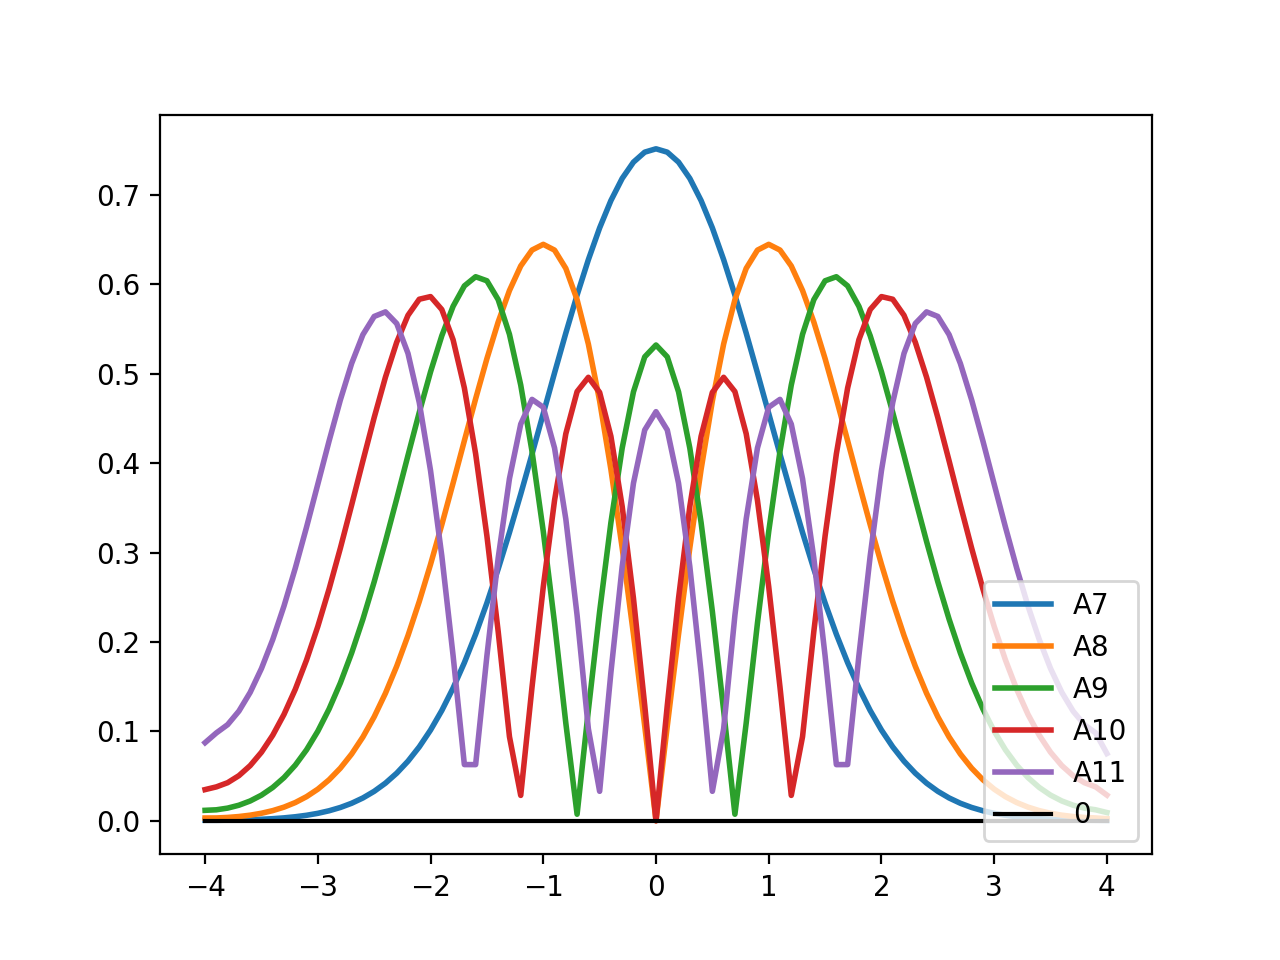

In [18]:
plt.plot(x_evals, A7, linewidth=2, label="A7")
plt.plot(x_evals, A8, linewidth=2, label="A8")
plt.plot(x_evals, A9, linewidth=2, label="A9")
plt.plot(x_evals, A10, linewidth=2, label="A10")
plt.plot(x_evals, A11, linewidth=2, label="A11")
plt.plot(x_evals, 0*x_evals, 'k', label="0")
plt.legend(loc="lower right")

In [19]:
A7

array([5.73383283e-04, 5.65512106e-04, 6.86056325e-04, 8.98810813e-04,
       1.22563002e-03, 1.69904226e-03, 2.36360740e-03, 3.27778429e-03,
       4.51615458e-03, 6.17184584e-03, 8.35897170e-03, 1.12148677e-02,
       1.49018556e-02, 1.96082238e-02, 2.55480721e-02, 3.29596494e-02,
       4.21018148e-02, 5.32482903e-02, 6.66794511e-02, 8.26715205e-02,
       1.01483207e-01, 1.23340025e-01, 1.48416790e-01, 1.76819022e-01,
       2.08564240e-01, 2.43564368e-01, 2.81610576e-01, 3.22362009e-01,
       3.65339760e-01, 4.09927295e-01, 4.55378245e-01, 5.00832048e-01,
       5.45337408e-01, 5.87882969e-01, 6.27434010e-01, 6.62973405e-01,
       6.93544652e-01, 7.18294469e-01, 7.36512306e-01, 7.47664239e-01,
       7.51418981e-01, 7.47664239e-01, 7.36512306e-01, 7.18294469e-01,
       6.93544652e-01, 6.62973405e-01, 6.27434010e-01, 5.87882969e-01,
       5.45337408e-01, 5.00832048e-01, 4.55378245e-01, 4.09927295e-01,
       3.65339760e-01, 3.22362009e-01, 2.81610576e-01, 2.43564368e-01,
      

In [37]:
A8

array([3.12307113e-03, 3.17867612e-03, 3.76100137e-03, 4.77370406e-03,
       6.29686661e-03, 8.44739612e-03, 1.13795768e-02, 1.52862089e-02,
       2.03994062e-02, 2.69901653e-02, 3.53658274e-02, 4.58645571e-02,
       5.88460092e-02, 7.46774682e-02, 9.37149511e-02, 1.16279079e-01,
       1.42625952e-01, 1.72913809e-01, 2.07166859e-01, 2.45238328e-01,
       2.86775409e-01, 3.31189309e-01, 3.77633932e-01, 4.24996815e-01,
       4.71905634e-01, 5.16752986e-01, 5.57741025e-01, 5.92946188e-01,
       6.20402499e-01, 6.38200141e-01, 6.44594175e-01, 6.38116701e-01,
       6.17684642e-01, 5.82694750e-01, 5.33097639e-01, 4.69443602e-01,
       3.92894705e-01, 3.05200017e-01, 2.08633657e-01, 1.05898335e-01,
       1.64526738e-14, 1.05898335e-01, 2.08633657e-01, 3.05200017e-01,
       3.92894705e-01, 4.69443602e-01, 5.33097639e-01, 5.82694750e-01,
       6.17684642e-01, 6.38116701e-01, 6.44594175e-01, 6.38200141e-01,
       6.20402499e-01, 5.92946188e-01, 5.57741025e-01, 5.16752986e-01,
      

In [38]:
A9

array([0.0117088 , 0.01231037, 0.01419729, 0.01742566, 0.02216981,
       0.02868059, 0.03727317, 0.04831407, 0.06220483, 0.07936046,
       0.10018143, 0.12501826, 0.15412897, 0.18763018, 0.22544424,
       0.2672455 , 0.31241029, 0.35997625, 0.40861707, 0.45663922,
       0.50200644, 0.54239673, 0.57529432, 0.59811617, 0.60836916,
       0.60383023, 0.58273785, 0.54398033, 0.4872638 , 0.41324255,
       0.32359492, 0.2210313 , 0.10922547, 0.00733321, 0.1235618 ,
       0.23406773, 0.33347556, 0.41677183, 0.47964042, 0.51876006,
       0.53203815, 0.51876006, 0.47964042, 0.41677183, 0.33347556,
       0.23406773, 0.1235618 , 0.00733321, 0.10922547, 0.2210313 ,
       0.32359492, 0.41324255, 0.4872638 , 0.54398033, 0.58273785,
       0.60383023, 0.60836916, 0.59811617, 0.57529432, 0.54239673,
       0.50200644, 0.45663922, 0.40861707, 0.35997625, 0.31241029,
       0.2672455 , 0.22544424, 0.18763018, 0.15412897, 0.12501826,
       0.10018143, 0.07936046, 0.06220483, 0.04831407, 0.03727

In [39]:
A10

array([3.48892450e-02, 3.79297795e-02, 4.26119897e-02, 5.04728887e-02,
       6.17203223e-02, 7.66583914e-02, 9.56360597e-02, 1.18993488e-01,
       1.47003099e-01, 1.79804440e-01, 2.17333938e-01, 2.59252738e-01,
       3.04877844e-01, 3.53123715e-01, 4.02462897e-01, 4.50915096e-01,
       4.96073863e-01, 5.35178600e-01, 5.65236739e-01, 5.83196616e-01,
       5.86166072e-01, 5.71665502e-01, 5.37897582e-01, 4.84010202e-01,
       4.10324924e-01, 3.18501689e-01, 2.11612087e-01, 9.40987354e-02,
       2.83928050e-02, 1.49311274e-01, 2.61613901e-01, 3.58271001e-01,
       4.32821388e-01, 4.79929216e-01, 4.95887773e-01, 4.79016632e-01,
       4.29905810e-01, 3.51473742e-01, 2.48823766e-01, 1.28904454e-01,
       2.53306207e-15, 1.28904454e-01, 2.48823766e-01, 3.51473742e-01,
       4.29905810e-01, 4.79016632e-01, 4.95887773e-01, 4.79929216e-01,
       4.32821388e-01, 3.58271001e-01, 2.61613901e-01, 1.49311274e-01,
       2.83928050e-02, 9.40987354e-02, 2.11612087e-01, 3.18501689e-01,
      

In [40]:
A11

array([0.08735718, 0.09828329, 0.10751121, 0.12264084, 0.14358292,
       0.17028181, 0.20259898, 0.24020276, 0.28246504, 0.32836942,
       0.37643907, 0.42469469, 0.4706544 , 0.51138702, 0.54362755,
       0.56395938, 0.56906092, 0.556006  , 0.52259792, 0.46770794,
       0.3915812 , 0.29606885, 0.18474465, 0.06287042, 0.06281414,
       0.1844845 , 0.29379329, 0.38256416, 0.44355858, 0.47123909,
       0.46244287, 0.41687966, 0.33737995, 0.22984194, 0.10285792,
       0.03296221, 0.16591443, 0.28428177, 0.37746005, 0.43700437,
       0.45747788, 0.43700437, 0.37746005, 0.28428177, 0.16591443,
       0.03296221, 0.10285792, 0.22984194, 0.33737995, 0.41687966,
       0.46244287, 0.47123909, 0.44355858, 0.38256416, 0.29379329,
       0.1844845 , 0.06281414, 0.06287042, 0.18474465, 0.29606885,
       0.3915812 , 0.46770794, 0.52259792, 0.556006  , 0.56906092,
       0.56395938, 0.54362755, 0.51138702, 0.4706544 , 0.42469469,
       0.37643907, 0.32836942, 0.28246504, 0.24020276, 0.20259